#**Introduction**

This case study focuses on analysing smart devices fitness data and determine how it could unlock new growth opportunities for Bellabeat.This is the capstone project for my Google Data Analytics Proffesional Certificate

Bellabeat is a high-tech company that manufactures health focused smart products for women.By collecting data on activity,sleep,stress and reproductive health Bellabeat empowers women with knowledge about their own health and habits.Bellabeat offers a variety of products such as Bellabeat app,Leaf,Time,Spring and also the Bellabeat membership.

#**Ask Phase**

##Business Task
To analyse and gain insights into how consumers use non-Bellabeat smart devices.Later apply these insights into Bellabeat's marketing stratergy.For this case study I'm going to focus on the Bellabeat app.

**Stakeholders:**
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team

#**Prepare and Process Phase**

##Installing and loading packages

In [1]:
install.packages("tidyverse")
install.packages("ggplot2")
library(ggplot2)
library(tidyverse)
library(dplyr)
library(readr)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘ggplot2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Att

##**Importing datasets**

For this case study I will be using the following datasets:
* dailyActivity_merged
* heartrate_seconds_merged
* minuteMETsNarrow_merged
* sleepDay_merged
* weightLogInfo_merged
* hourlyIntensities_merged
* hourlyCalories_merged
* hourlySteps_merged

In [2]:
cleaned_dailyactv<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
minuteMET<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
sleep<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hour_inst<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hour_calr<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hour_step<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 2483658 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1325580 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, METs


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet thi

##Previewing the datasets imported

In [3]:
head(cleaned_dailyactv)
head(heartrate)
head(minuteMET)
head(sleep)
head(weight)
head(hour_inst)
head(hour_calr)
head(hour_step)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


##Merging datasets

Here I'll be merging 3 datasets: hour_inst,hour_calr and hour_activity in order to get all the hour based data combined in a single dataset. The merging is done by using Id and ActivityHour as the primary keys.

In [4]:
hour_activity<-merge(hour_inst,hour_calr,by=c('Id','ActivityHour'))
hour_activity_merged<-merge(hour_activity,hour_step,by=c('Id','ActivityHour'))
head(hour_activity_merged)

,Id,ActivityHour,TotalIntensity,AverageIntensity,Calories,StepTotal
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333,61,160
2,1503960366,4/12/2016 1:00:00 PM,6,0.100000,66,221
3,1503960366,4/12/2016 10:00:00 AM,29,0.483333,99,676
4,1503960366,4/12/2016 10:00:00 PM,9,0.150000,65,89
5,1503960366,4/12/2016 11:00:00 AM,12,0.200000,76,360
6,1503960366,4/12/2016 11:00:00 PM,21,0.350000,81,338


In [5]:
sum(duplicated(hour_activity_merged))
sum(duplicated(cleaned_dailyactv))
sum(duplicated(hour_activity_merged))
sum(duplicated(minuteMET))
sum(duplicated(sleep))
sleep<-sleep%>%distinct()    #removed duplicates
sum(duplicated(weight))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

While checking for duplicate data in the datasets it was found that the sleep dataframe has 3 duplicate rows. All the 3 duplicate rows have been removed.

##Formatting dates

In [6]:
#formatting dates
cleaned_dailyactv$ActivityDate<- parse_date_time(cleaned_dailyactv$ActivityDate, "%m-%d-%y")

weight$Date<-parse_date_time(weight$Date,"%m-%d-%y  %H:%M:%S, %p")

sleep$SleepDay<-parse_date_time(sleep$SleepDay,"%m-%d-%y  %H:%M:%S, %p")

minuteMET$ActivityMinute<-parse_date_time(minuteMET$ActivityMinute,"%m-%d-%y  %H:%M:%S, %p")

heartrate$Time<-parse_date_time(heartrate$Time,"%m-%d-%y  %H:%M:%S, %p")

hour_activity_merged$ActivityHour<-parse_date_time(hour_activity_merged$ActivityHour,"%m-%d-%y  %H:%M:%S, %p")

In [7]:
#finding if there are null values
sum(is.na(cleaned_dailyactv))
sum(is.na(heartrate))
sum(is.na(hour_activity_merged))
sum(is.na(minuteMET))
sum(is.na(sleep))
sum(is.na(weight))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

While checking for NULL values in the datasets it was found that the weight dataset has 65 NULL values. These NULL values were dropped during analysis.

In [8]:
#renaming column names
colnames(heartrate)[colnames(heartrate)=="Value"] <- "heartrate_value"
colnames(sleep)[colnames(sleep)=="SleepDay"] <- "sleepTime"
colnames(weight)[colnames(weight)=="WeightKg"] <- "weight_kg"
colnames(weight)[colnames(weight)=="WeightPounds"] <- "weight_pounds"
colnames(cleaned_dailyactv)
colnames(heartrate)
colnames(hour_activity_merged)
colnames(minuteMET)
colnames(sleep)
colnames(weight)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"              "Time"            "heartrate_value"

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"
[5] "Calories"         "StepTotal"

[1] "Id"             "ActivityMinute" "METs"

[1] "Id"                 "sleepTime"          "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "Date"           "weight_kg"      "weight_pounds" 
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

#**Analyse and Share Phase**

In [9]:
#average hours asleep and average hours in bed - grouped by Id
sleep$sleep_hrs<-sleep$TotalMinutesAsleep/60
sleep$bedtime_hrs<-sleep$TotalTimeInBed/60
sleep %>% group_by(Id)%>% drop_na() %>% summarize(avg_hrs_asleep=mean(sleep_hrs),avg_hrs_bed=mean(bedtime_hrs))

Id,avg_hrs_asleep,avg_hrs_bed
<dbl>,<dbl>,<dbl>
1503960366,6.004667,6.386667
1644430081,4.900000,5.766667
1844505072,10.866667,16.016667
1927972279,6.950000,7.296667
2026352035,8.436310,8.960714
2320127002,1.016667,1.150000
2347167796,7.446667,8.188889
3977333714,4.894048,7.685714
4020332650,5.822917,6.329167


In [10]:
#statistical summary of TotalMinutesAsleep and TotalTimeinBed
sleep %>% select(TotalMinutesAsleep,TotalTimeInBed) %>% summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

The average hrs of sleep is nearly 7 hrs.

In [11]:
#average hours in bed and average hours asleep - grouped by day of the week
sleep$SleepDay<-c(" ")
sleep$SleepDay<-weekdays(as.Date(sleep$sleepTime))
sleep_day<-sleep %>% group_by(SleepDay) %>% drop_na() %>% summarize(avg_hrs_sleepday=mean(TotalMinutesAsleep/60),avg_hrs_sleepbed=mean(TotalTimeInBed/60))
sleep_day

SleepDay,avg_hrs_sleepday,avg_hrs_sleepbed
<chr>,<dbl>,<dbl>
Friday,6.757018,7.417544
Monday,6.991667,7.622464
Saturday,6.984503,7.664035
Sunday,7.545758,8.391818
Thursday,6.688281,7.247917
Tuesday,6.742308,7.388205
Wednesday,7.244697,7.833838


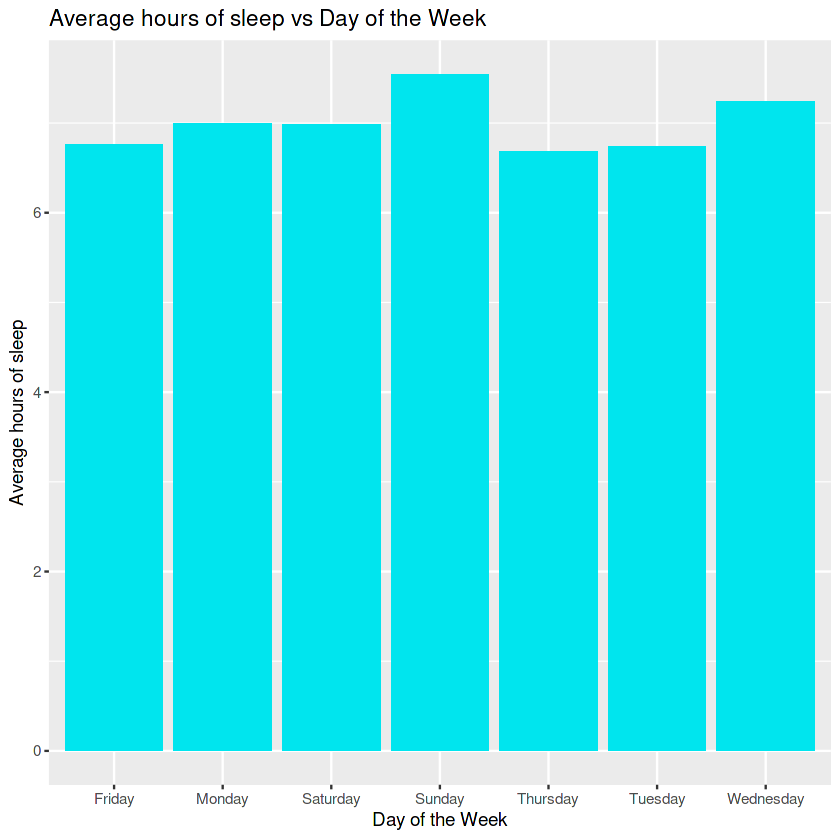

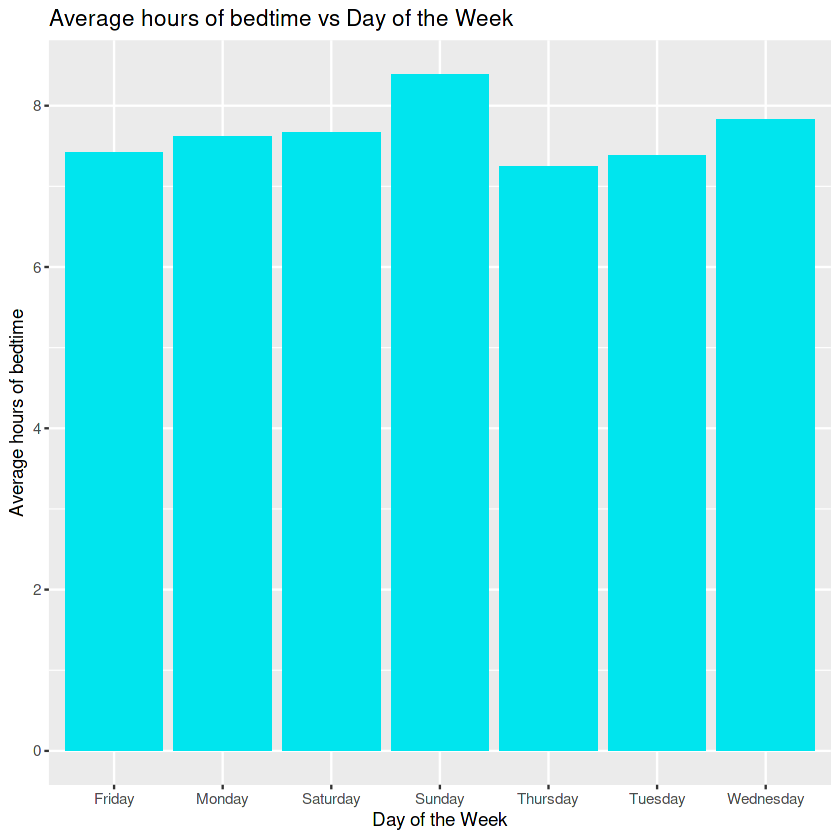

In [12]:
#plot showing relationship between day of the week and average hours asleep , day of the week and average hours in bed
ggplot(data=sleep_day)+geom_bar(stat="identity",mapping=aes(x=SleepDay,y=avg_hrs_sleepday),fill='turquoise2')+labs(title="Average hours of sleep vs Day of the Week",x="Day of the Week",y="Average hours of sleep")
ggplot(data=sleep_day)+geom_bar(stat="identity",mapping=aes(x=SleepDay,y=avg_hrs_sleepbed),fill='turquoise2')+labs(title="Average hours of bedtime vs Day of the Week",x="Day of the Week",y="Average hours of bedtime")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



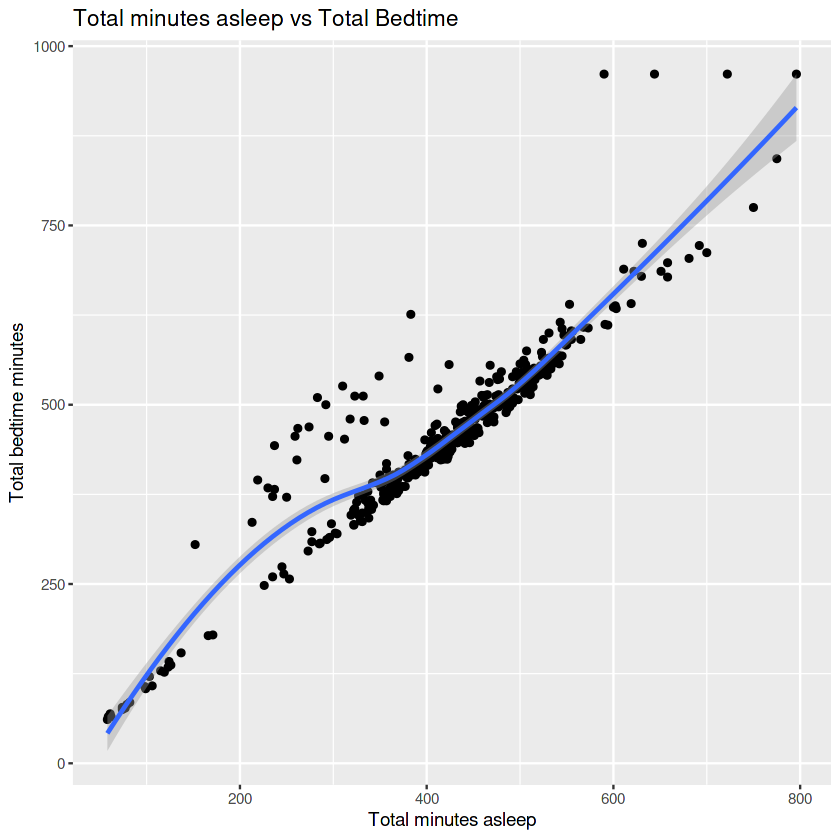

In [13]:
#plot showing relationship between total minutes in bed and total minutes asleep
ggplot(data=sleep)+geom_point(mapping=aes(x=TotalMinutesAsleep,y=TotalTimeInBed))+geom_smooth(mapping=aes(x=TotalMinutesAsleep,y=TotalTimeInBed))+labs(title="Total minutes asleep vs Total Bedtime",x="Total minutes asleep",y="Total bedtime minutes")

In [14]:
#statistical summary of WeightKg,Fat,BMI
weight %>% select(weight_kg,Fat,BMI) %>% summary()

   weight_kg           Fat             BMI       
 Min.   : 52.60   Min.   :22.00   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:22.75   1st Qu.:23.96  
 Median : 62.50   Median :23.50   Median :24.39  
 Mean   : 72.04   Mean   :23.50   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:24.25   3rd Qu.:25.56  
 Max.   :133.50   Max.   :25.00   Max.   :47.54  
                  NA's   :65                     

The average BMI is 25.56 which is considered to be 'overweight' BMI.

In [15]:
#average weight in kg- grouped by Id
mn_weight<-weight %>% group_by(Id) %>% summarize(avg_weight_kg=mean(weight_kg))
mn_weight

Id,avg_weight_kg
<dbl>,<dbl>
1503960366,52.60000
1927972279,133.50000
2873212765,57.00000
4319703577,72.35000
4558609924,69.64000
5577150313,90.70000
6962181067,61.55333
8877689391,85.14583


I noticed that there are only 8 people whose data is available in the weight dataset. The number of people whose records are available is insufficient.

In [16]:
#finding the number of months for which the data is entered
weight$weight_month<-format(weight$Date,format="%B")
n_distinct(weight$weight_month)

[1] 2

I further noticed that the people who had recorded their data have done it for only 2 months. This data is clearly insufficient to draw insights. Hence I decided I will not be using the weight dataset further.

In [17]:
#METs summary
minuteMET %>% select(METs) %>% summary()

      METs       
 Min.   :  0.00  
 1st Qu.: 10.00  
 Median : 10.00  
 Mean   : 14.69  
 3rd Qu.: 11.00  
 Max.   :157.00  

MET is the ratio of your working metabolic rate relative to your resting metabolic rate. One MET is the energy you use when at rest. This means an activity with a MET of four, would require a person to exert four times the energy they do when they are sitting.The average MET is 14.69 . This value is considered to be very high. 

In [18]:
#METs summarised based on group id
minuteMET %>% group_by(Id)%>% summarize(METs)

`summarise()` has grouped output by 'Id'. You can override using the `.groups` argument.



Id,METs
<dbl>,<dbl>
1503960366,10
1503960366,10
1503960366,10
1503960366,10
1503960366,10
1503960366,12
1503960366,12
1503960366,12
1503960366,12


##Classifying the type of activity based on MET values
Based on the value of METs we can classify the activity type as follows
1. Sedentary -> METs<1.5
2. Light Intensity -> METs>1.5 and METs <3.0
3. Moderate Intensity -> METs>3.0 and METs<6.0
4. Vigorous Intensity -> METs>6.0

The activity type is classified with reference to [*this*](https://www.hsph.harvard.edu/nutritionsource/staying-active/#:~:text=METs,may%20use%208%2D9%20METs.) article

In [19]:
#categorising activity_type based on METs
minuteMET$activity_type<-c(" ")
minuteMET$activity_type=case_when(minuteMET$METs<=1.5~'Sedentary', ((minuteMET$METs>1.5)&(minuteMET$METs<3.0))~'Light Intensity',((minuteMET$METs>3.0)&(minuteMET$METs)<6.0)~'moderate Intensity',TRUE ~'Vigorous Intensity')
head(minuteMET)

Id,ActivityMinute,METs,activity_type
<dbl>,<dttm>,<dbl>,<chr>
1503960366,2016-04-12 00:00:00,10,Vigorous Intensity
1503960366,2016-04-12 00:01:00,10,Vigorous Intensity
1503960366,2016-04-12 00:02:00,10,Vigorous Intensity
1503960366,2016-04-12 00:03:00,10,Vigorous Intensity
1503960366,2016-04-12 00:04:00,10,Vigorous Intensity
1503960366,2016-04-12 00:05:00,12,Vigorous Intensity


In [20]:
#finding the number of categories the data is divided into 
met_type<- minuteMET %>% group_by(minuteMET$activity_type) %>% summarise(num=n_distinct(METs))
met_type

minuteMET$activity_type,num
<chr>,<int>
Sedentary,1
Vigorous Intensity,135


The number of people doing vigorous intensity activity is very high. This leads to the assumption that the smart device is not calculating the METs properly and hence the minuteMET dataset will no longer be used for analysis.

In [21]:
#statistical summary of heartrate value
heartrate %>% select(heartrate_value) %>% summary()

 heartrate_value 
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

The average heartrate is 77.33 beats per minute(bpm). This fits in the normal range. For men the normal range is 50 to 80 bpm and 53 to 82 bpm for women.

In [22]:
#summary of mean heartrate value grouped by Id
heartrate_analysed<- heartrate %>% group_by(Id) %>% summarise(avg_heartrate=mean(heartrate_value))
head(heartrate_analysed)

Id,avg_heartrate
<dbl>,<dbl>
2022484408,80.23686
2026352035,93.77631
2347167796,76.72279
4020332650,82.30058
4388161847,66.13300
4558609924,81.67395


In [23]:
#statistical summary about TotalIntensity,Calories and StepTotal
hour_activity_merged %>% select(TotalIntensity,Calories,StepTotal) %>% summary()

 TotalIntensity      Calories        StepTotal      
 Min.   :  0.00   Min.   : 42.00   Min.   :    0.0  
 1st Qu.:  0.00   1st Qu.: 63.00   1st Qu.:    0.0  
 Median :  3.00   Median : 83.00   Median :   40.0  
 Mean   : 12.04   Mean   : 97.39   Mean   :  320.2  
 3rd Qu.: 16.00   3rd Qu.:108.00   3rd Qu.:  357.0  
 Max.   :180.00   Max.   :948.00   Max.   :10554.0  

In [24]:
hour_activity_merged %>% group_by(Id) %>% summarize(avg_intensity=mean(TotalIntensity),avg_steps=mean(StepTotal),avg_calr=mean(Calories))

Id,avg_intensity,avg_steps,avg_calr
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,16.170153,522.37936,78.50349
1624580081,8.039402,241.50815,62.47283
1644430081,10.519774,307.80650,118.82062
1844505072,5.021888,109.35978,66.59508
1927972279,1.857337,38.58696,91.50408
2022484408,17.031250,477.86957,105.47962
2026352035,10.812500,233.78804,64.91168
2320127002,8.742857,198.68707,72.55510
2347167796,14.521739,413.85749,88.71739


In [25]:
#Separating ActivityHour into Date and Time columns
hour_activity_merged$time=c(" ")
hour_activity_merged$time<-format(hour_activity_merged$ActivityHour,format="%H:%M:%S")
hour_activity_merged$date=c(" ")
hour_activity_merged$date<-format(hour_activity_merged$ActivityHour,format="%y/%m/%d")

#Finding the corresponding day with respect to the Date
hour_activity_merged$day=c(" ")
hour_activity_merged$day<-weekdays(as.Date(hour_activity_merged$date))
head(hour_activity_merged)

,Id,ActivityHour,TotalIntensity,AverageIntensity,Calories,StepTotal,time,date,day
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1503960366,2016-04-12 01:00:00,8,0.133333,61,160,01:00:00,16/04/12,Tuesday
2,1503960366,2016-04-12 13:00:00,6,0.100000,66,221,13:00:00,16/04/12,Tuesday
3,1503960366,2016-04-12 10:00:00,29,0.483333,99,676,10:00:00,16/04/12,Tuesday
4,1503960366,2016-04-12 22:00:00,9,0.150000,65,89,22:00:00,16/04/12,Tuesday
5,1503960366,2016-04-12 11:00:00,12,0.200000,76,360,11:00:00,16/04/12,Tuesday
6,1503960366,2016-04-12 23:00:00,21,0.350000,81,338,23:00:00,16/04/12,Tuesday


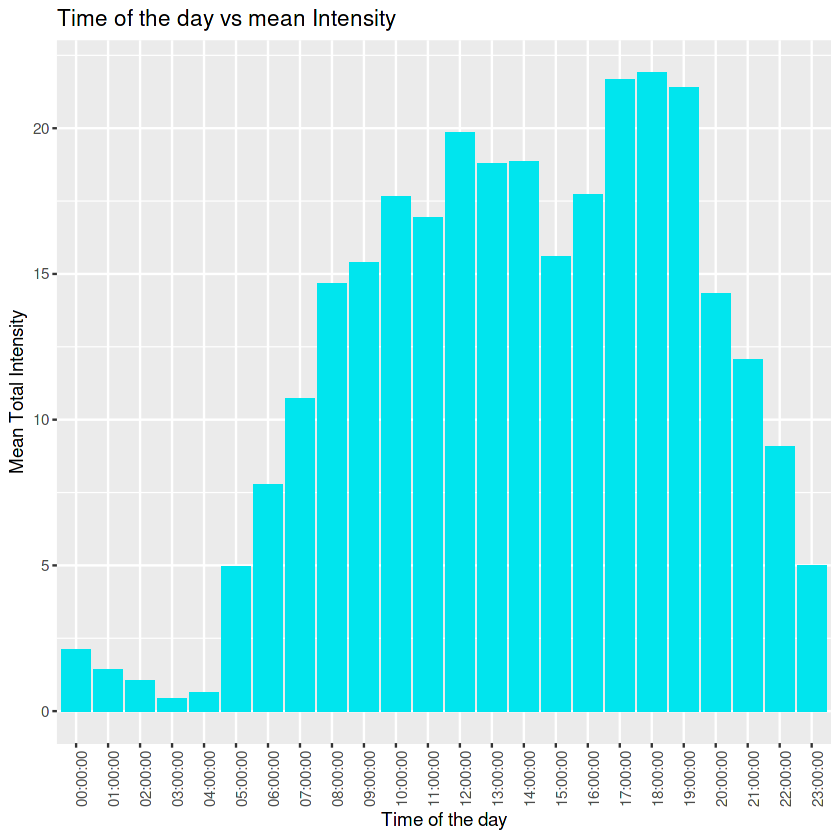

In [26]:
#plot showing the relationship between the time of the day and mean intensity
intensity_hour <- hour_activity_merged %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))
ggplot(data=intensity_hour)+geom_bar(stat="identity",mapping = aes(x=time,y=mean_total_int),fill='turquoise2')+theme(axis.text.x=element_text(angle=90))+labs(title="Time of the day vs mean Intensity",x="Time of the day",y="Mean Total Intensity")

This plot shows that most people are active between 5:00pm-7:00pm in the evening. I suppose people prefer working out after coming back from work.**I suggest that we can remind people to complete their workouts in this time range using the Bellabeat app. **

day,mean_total_int
<chr>,<dbl>
Friday,12.09309
Monday,12.11220
Saturday,12.90086
Sunday,10.98377
Thursday,11.92690
Tuesday,12.44278
Wednesday,11.75867


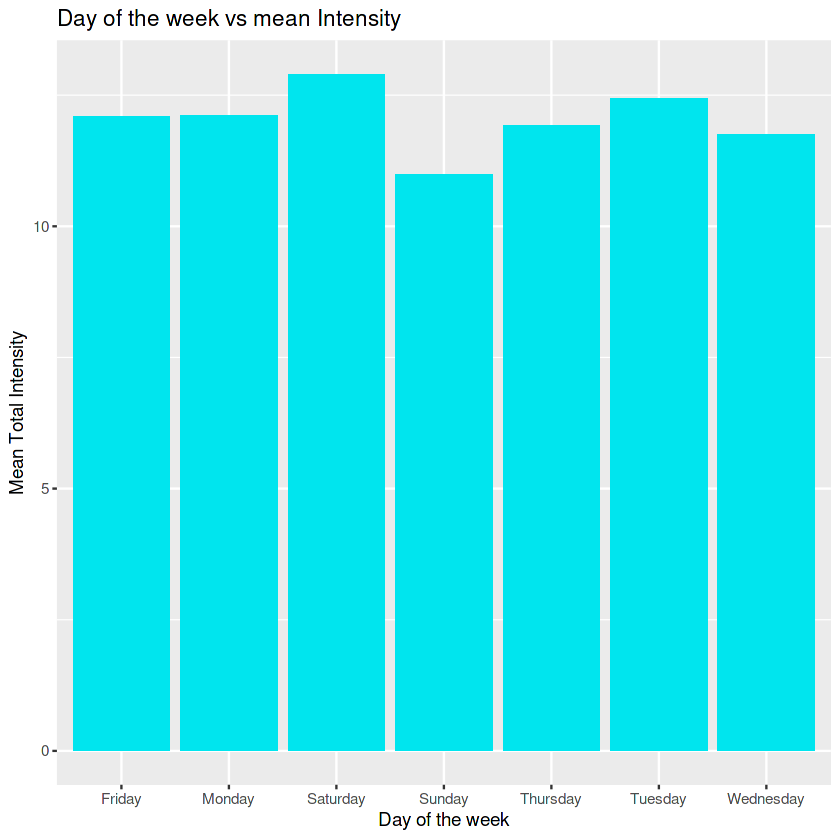

In [27]:
#plot showing the relationship between day of the week and mean intensity
day_intensity<-hour_activity_merged %>% group_by(day)%>% drop_na()%>% summarise(mean_total_int=mean(TotalIntensity))
day_intensity
ggplot(data=day_intensity)+geom_bar(stat="identity",mapping= aes(x=day,y=mean_total_int),fill='turquoise2')+labs(title="Day of the week vs mean Intensity",x="Day of the week",y="Mean Total Intensity")

In all the days of the week the intensity of the activity is nearly same. Comparatively on sunday the intensity is less.

In [28]:
#summary of mean steps, mean distance and mean calories grouped by ID
cleaned_dailyactv %>% group_by(Id) %>% summarise(mean_steps=mean(TotalSteps),mean_distance=mean(TotalDistance),mean_Calories=mean(Calories))

Id,mean_steps,mean_distance,mean_Calories
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,7.8096774,1816.419
1624580081,5743.903,3.9148387,1483.355
1644430081,7282.967,5.2953334,2811.300
1844505072,2580.065,1.7061290,1573.484
1927972279,916.129,0.6345161,2172.806
2022484408,11370.645,8.0841935,2509.968
2026352035,5566.871,3.4548387,1540.645
2320127002,4716.871,3.1877419,1724.161
2347167796,9519.667,6.3555555,2043.444


In [29]:
#statistical summary of TotalSteps, TotalDistance and Calories
cleaned_dailyactv %>% select(TotalSteps,TotalDistance,Calories) %>% summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

##Classifying the type of user based on the average steps
Based on the number of average steps the users can be classified into the following categories:
1. Sedentary -> average steps<5000
2. Low Active -> average steps>5000 and average steps<7499
3. Fairly Active-> average steps>7500 and average steps<9999
4. Highly Active-> average steps>9999

The type of users have been classified with refernce to [*this*](https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm) article.I also found out what percent each category makes in the total

type_user,total,percentage
<chr>,<int>,<dbl>
Fairly Active,9,27.27273
Highly active,7,21.21212
Low active,9,27.27273
Sedentary,8,24.24242


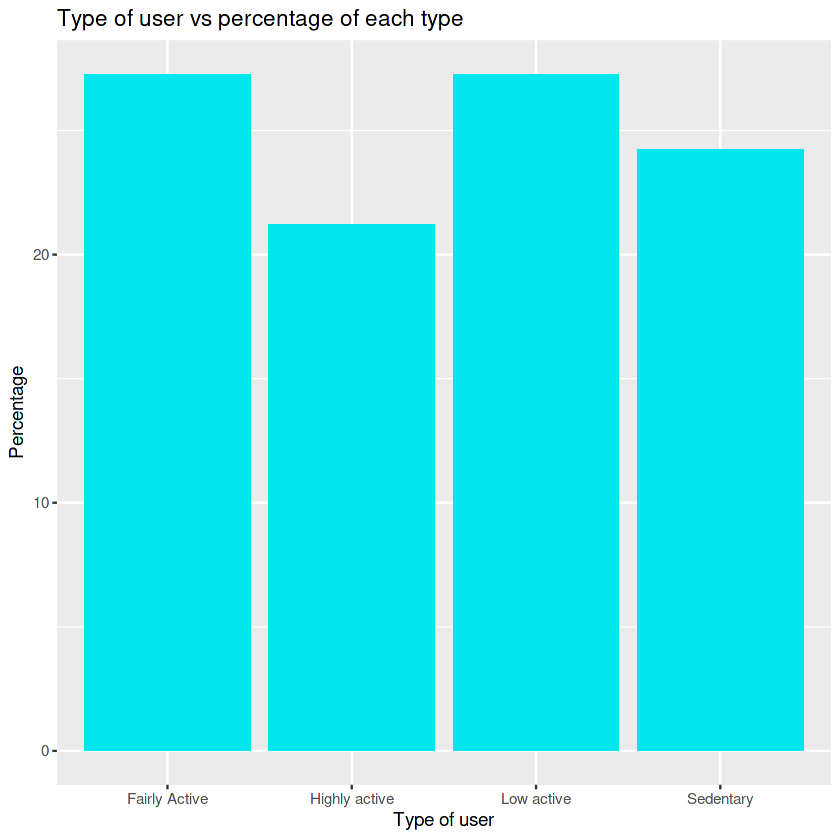

In [30]:
#categorising mean steps into sedentary, low active,fairly active and highly active and finding the percentage of total of each category
activity_type<- cleaned_dailyactv %>% group_by(Id) %>% summarise(mean_steps=mean(TotalSteps))
type_user<- activity_type %>% mutate(type_user=case_when(mean_steps<5000~'Sedentary',mean_steps>5000 & mean_steps<7499~'Low active',mean_steps>7500 & mean_steps<9999~'Fairly Active',TRUE ~'Highly active'))
percentage<- type_user %>% group_by(type_user) %>% summarise(total=n()) %>% mutate(percentage= (total/sum(total))*100)
percentage
ggplot(data=percentage)+geom_bar(stat="identity",mapping=aes(x=type_user,y=percentage),fill='turquoise2')+labs(title="Type of user vs percentage of each type",x="Type of user",y="Percentage")

The percentage of users who are fairly active and low active is the same. Number of users who are highly active is comparatively less. **I suggest that in the bellabeat app we can indicate in which category the user lies in and motivate them to try and aim for the next levels.**

day,mean_dist
<chr>,<dbl>
Friday,5.309921
Monday,5.552917
Saturday,5.854677
Sunday,5.027190
Thursday,5.312245
Tuesday,5.832237
Wednesday,5.488333


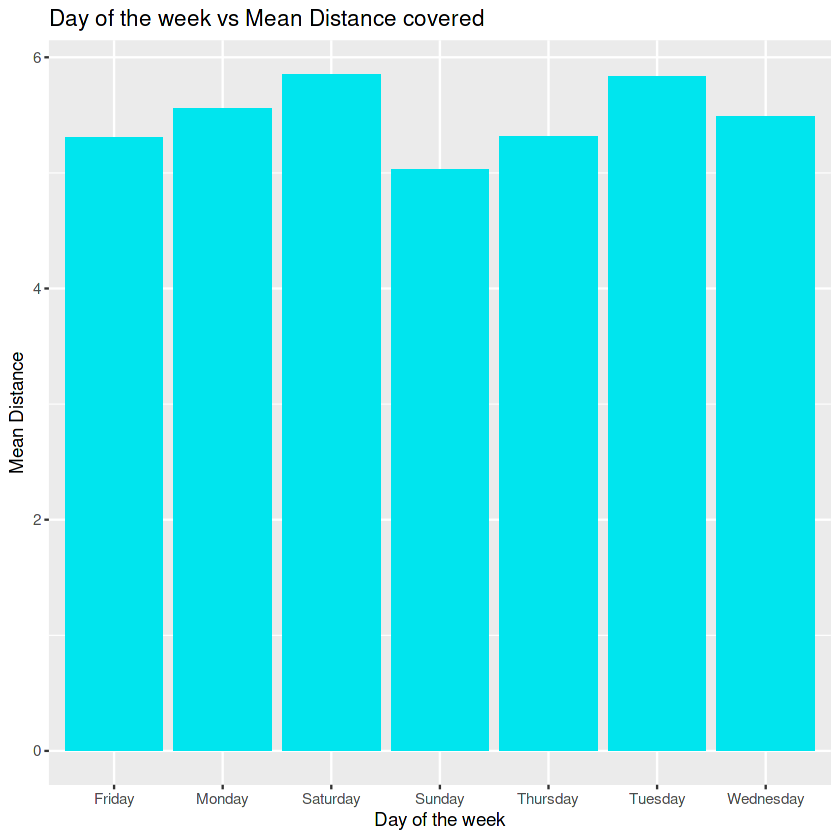

In [31]:
#assigning the days of the week corresponding to the date given
cleaned_dailyactv$day=c(" ")
cleaned_dailyactv$day<-weekdays(as.Date(cleaned_dailyactv$ActivityDate))

#plot to show the relationship between the day of the week and the mean distance covered
distance_day<- cleaned_dailyactv %>% group_by(day) %>% summarise(mean_dist=mean(TotalDistance))
distance_day
ggplot(data=distance_day)+geom_bar(stat="identity",mapping = aes(x=day,y=mean_dist),fill='turquoise2')+labs(title="Day of the week vs Mean Distance covered",x="Day of the week",y="Mean Distance")

This plot clearly shows that the mean distance covered is nearly the same in all days of the week.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



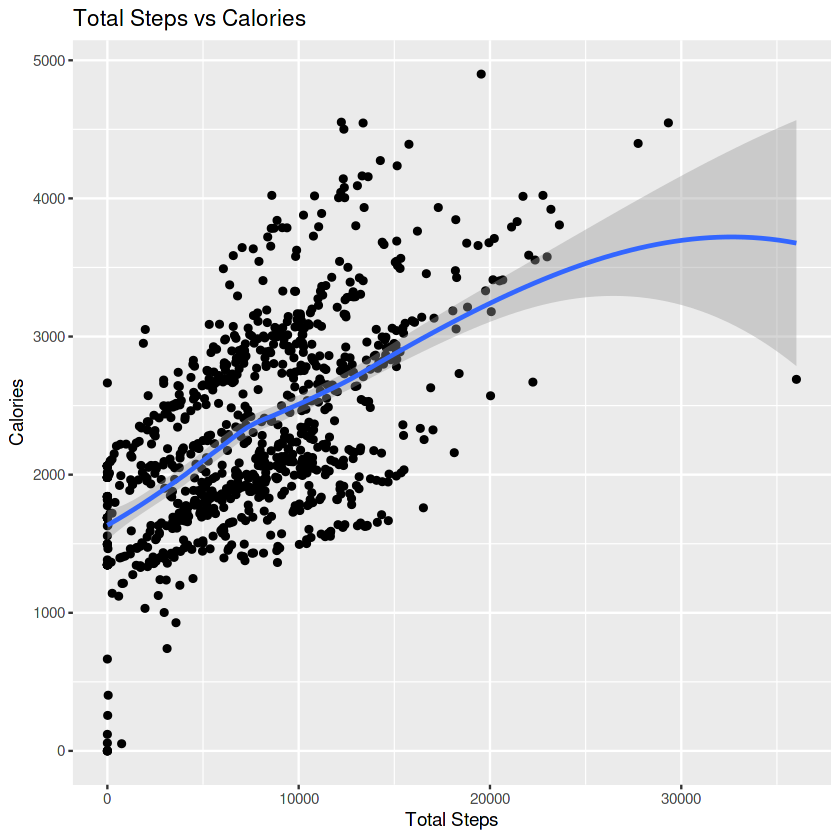

In [32]:
#plot to show the relationship between Totalsteps and Calories
ggplot(data=cleaned_dailyactv)+ geom_point(mapping=aes(x=TotalSteps,y=Calories))+geom_smooth(mapping=aes(x=TotalSteps,y=Calories))+labs(title="Total Steps vs Calories",x="Total Steps",y="Calories")

This plot shows positive correlation between Total Steps and Calories. This is obvious as the more steps you walk more will be the calories burnt.

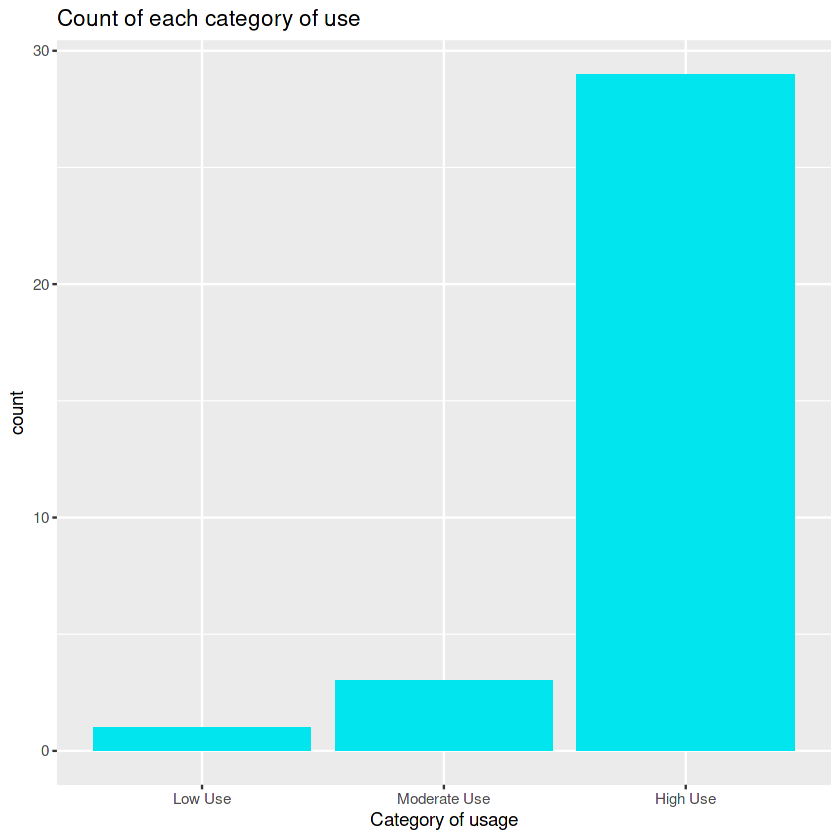

In [33]:
#categorising users into low use,moderate use and high use
user_freq <- cleaned_dailyactv %>%
  group_by(Id)%>%
  summarize(Activity_Date=sum(n())) %>%
  mutate(usage = case_when(
    Activity_Date >= 1 & Activity_Date <= 10 ~ "Low Use",
    Activity_Date >= 11 & Activity_Date <= 21 ~ "Moderate Use", 
    Activity_Date >= 22 & Activity_Date <= 31 ~ "High Use"))%>%
  mutate(usage = factor(usage, level = c("Low Use", "Moderate Use", "High Use")))%>%
  rename(Use_days = Activity_Date)%>%
  group_by(usage)
#plot showing the usage levels of users
ggplot(data=user_freq)+ geom_bar(mapping=aes(x=usage),fill='turquoise2')+labs(title="Count of each category of use",x="Category of usage",y="count")

This plot clearly shows that majority of the people use the smart device frequently.

In [34]:
#combining the user_freq and type_user dataframes to find if there is any relation between type_user and usage
user_daily<-merge(user_freq,type_user,by=c('Id'))
table(user_daily$usage, user_daily$type_user)

              
               Fairly Active Highly active Low active Sedentary
  Low Use                  0             0          0         1
  Moderate Use             1             0          2         0
  High Use                 8             7          7         7

Here I tried to see if there is any relation between the type of user and how they use the smart devices. Clearly there is no specific relation between them.

#**Recommendations **

The Bellabeat app can be made as an complete lifestyle tracking app. I would like to recommend the following to the stakeholders:
1. During analysis I found that most people are active during the evening i.e from 5:00pm to 7:00pm. So reminding people before 5:00pm to complete their day's scheduled workout can help them stay on track and be consistent.
2. The users can be classified into types like sedentary,low active,fairly active and highly active. The type in which the user lies can be indicated in the app and they can be motivated to bridge the gap and reach the next level. The amount of steps more required to achieve the next level can be shown at the start of each month to motivate the users.
3. Based on the goals of the user they can be suggested with healthy diets, ideal and fixed sleep pattern and time,different types of workout like weight training,cardio,yoga etc.
4. Based on the location of users they can also be notified in case there is any walktahon or marathon in the nearby areas. In this way they can participate in various activities and also interact with other people who are into fitness.
5. The users can be given a "connect with your friends" option in the app. They can use this to connect with their friends who are using this app and create workout goal challenges for each other. They can also invite their other friends who are currently not using the app to join the app and compete with them.
6. The users who maintain their activity level as highly active for atleast 3 months consistently can be awarded with reward points which they can redeem in any retail or online outlet.